In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread_collection
import os

In [110]:
lfw_path = os.path.join('/Users/chris/Desktop/Cog403 final', 'lfw')

img_size = (96, 96)
batch = 16

# preprocessing image by rescaling to [0,1] & splitting 80% training 20% testing
pre_data = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, validation_split = 0.2)

# generating training set
training = pre_data.flow_from_directory(
    lfw_path,
    target_size = img_size,
    batch_size = batch,
    class_mode = 'categorical',
    subset = 'training'
    
)

# generating testing set
testing = pre_data.flow_from_directory(
    lfw_path,
    target_size = img_size,
    batch_size = batch,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 12161 images belonging to 5749 classes.
Found 1072 images belonging to 5749 classes.


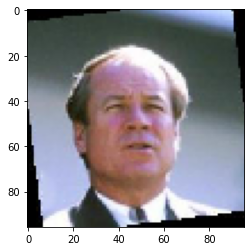

[0. 0. 0. ... 0. 0. 0.]


In [121]:
import matplotlib.pyplot as plt
images, labels = training.next()
plt.imshow(images[0])
plt.show()
print(labels[0])

In [119]:
# Define CNN Model by using Keras Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [53]:
# Two onvolutional layers + Two max-pooling + One flatten layer + a fully connected layer
# with ReLU as activation function
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size[0], img_size[1], 3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation = 'relu'))  # with 512 neurons
# 2 neurons outputs the probabilities of the input image belonging to each of the 2 classes: match or not
cnn.add(Dense(5749, activation = 'softmax'))  
# compile the model: adam optimizer, categorical cross-entropy loss f.
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [55]:
# use the testing generator to evaluate the performance of the model on the testing set
trained_cnn = cnn.fit(
    training,
    steps_per_epoch = len(training),
    epochs = 10,       # number of time the entire dataset is trained
    validation_data = testing,
    validation_steps = len(testing)
)

Epoch 1/10


2023-04-01 20:19:17.522591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - ETA: 0s - loss: 7.6170 - accuracy: 0.0370

2023-04-01 20:26:09.341617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - 424s 1s/step - loss: 7.6170 - accuracy: 0.0370 - val_loss: 5.8558 - val_accuracy: 0.1101
Epoch 2/10
381/381 [==============================] - 458s 1s/step - loss: 6.9914 - accuracy: 0.0492 - val_loss: 5.3803 - val_accuracy: 0.1315
Epoch 3/10
381/381 [==============================] - 483s 1s/step - loss: 5.9883 - accuracy: 0.0712 - val_loss: 5.4724 - val_accuracy: 0.1343
Epoch 4/10
381/381 [==============================] - 471s 1s/step - loss: 4.4854 - accuracy: 0.1547 - val_loss: 6.1047 - val_accuracy: 0.1409
Epoch 5/10
381/381 [==============================] - 475s 1s/step - loss: 2.5891 - accuracy: 0.4218 - val_loss: 7.2393 - val_accuracy: 0.1343
Epoch 6/10
381/381 [==============================] - 463s 1s/step - loss: 1.0719 - accuracy: 0.7332 - val_loss: 10.3820 - val_accuracy: 0.1278
Epoch 7/10
381/381 [==============================] - 473s 1s/step - loss: 0.3727 - accuracy: 0.9003 - val_loss: 12.5108 - val_accuracy: 0.1287
Epoch 8/

In [58]:
loss, acc = cnn.evaluate(
    testing,
    steps = len(testing)
)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

2023-04-01 21:48:21.197885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 10s 279ms/step - loss: 15.6242 - accuracy: 0.1147
Test Accuracy: 0.11473880708217621
Test Loss: 15.62417984008789


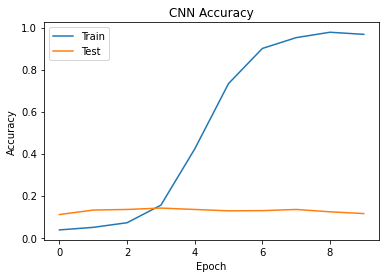

In [59]:
plt.plot(trained_cnn.history['accuracy'])
plt.plot(trained_cnn.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [69]:
# Two onvolutional layers + Two max-pooling + One flatten layer + a fully connected layer
# with ReLU as activation function
from keras.layers import Dropout
cnn1 = Sequential()
cnn1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (250, 250, 3)))
cnn1.add(MaxPooling2D((2,2)))
cnn1.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn1.add(MaxPooling2D((2,2)))
cnn1.add(Flatten())
cnn1.add(Dense(256, activation = 'relu'))  # with 512 neurons
cnn1.add(Dropout(0.5))
# 2 neurons outputs the probabilities of the input image belonging to each of the 2 classes: match or not
cnn1.add(Dense(5749, activation = 'softmax'))  
# compile the model: adam optimizer, categorical cross-entropy loss f.
cnn1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)
train_cnn1 = cnn1.fit(
    training,
    steps_per_epoch = len(training),
    epochs = 10,       # number of time the entire dataset is trained
    validation_data = testing,
    validation_steps = len(testing),
    callbacks = [earlystop],
    verbose = 1
)

Epoch 1/10


2023-04-01 23:09:42.975395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - ETA: 0s - loss: 8.3354 - accuracy: 0.0326

2023-04-01 23:16:16.153892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - 401s 1s/step - loss: 8.3354 - accuracy: 0.0326 - val_loss: 6.8202 - val_accuracy: 0.0989
Epoch 2/10
381/381 [==============================] - 406s 1s/step - loss: 8.0005 - accuracy: 0.0349 - val_loss: 6.4312 - val_accuracy: 0.0989
Epoch 3/10
381/381 [==============================] - 408s 1s/step - loss: 7.7944 - accuracy: 0.0356 - val_loss: 6.2504 - val_accuracy: 0.1007
Epoch 4/10
381/381 [==============================] - 407s 1s/step - loss: 7.4996 - accuracy: 0.0410 - val_loss: 5.7664 - val_accuracy: 0.1241
Epoch 5/10
381/381 [==============================] - 707s 2s/step - loss: 7.0097 - accuracy: 0.0542 - val_loss: 5.8073 - val_accuracy: 0.1381
Epoch 6/10
381/381 [==============================] - 388s 1s/step - loss: 6.2798 - accuracy: 0.0835 - val_loss: 5.3782 - val_accuracy: 0.1716
Epoch 7/10
381/381 [==============================] - 389s 1s/step - loss: 5.3106 - accuracy: 0.1473 - val_loss: 5.3634 - val_accuracy: 0.1968
Epoch 8/10

In [67]:
loss, acc = cnn1.evaluate(
    testing,
    steps = len(testing)
)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

2023-04-02 11:33:50.581927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 8s 221ms/step - loss: 5.5701 - accuracy: 0.1922
Test Accuracy: 0.19216418266296387
Test Loss: 5.570089340209961


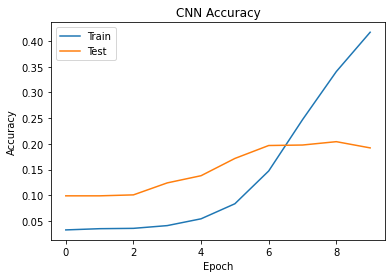

In [68]:
plt.plot(train_cnn1.history['accuracy'])
plt.plot(train_cnn1.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [89]:
from keras.layers import Dropout
cnn3 = Sequential()
cnn3.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (img_size[0], img_size[1], 3)))
cnn3.add(MaxPooling2D((2,2)))
cnn3.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn3.add(MaxPooling2D((2,2)))
cnn3.add(Conv2D(48, (3, 3), activation = 'relu'))
cnn3.add(MaxPooling2D((2,2)))
cnn3.add(Flatten())
cnn3.add(Dense(160, activation = 'relu'))  # with 512 neurons
cnn3.add(Dropout(0.5))
# 2 neurons outputs the probabilities of the input image belonging to each of the 2 classes: match or not
cnn3.add(Dense(5749, activation = 'softmax'))  
# compile the model: adam optimizer, categorical cross-entropy loss f.
cnn3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [90]:
from tensorflow.keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)
train_cnn3 = cnn3.fit(
    training,
    steps_per_epoch = len(training),
    epochs = 15,       # number of time the entire dataset is trained
    validation_data = testing,
    validation_steps = len(testing)
)

Epoch 1/15


2023-04-02 12:48:58.443878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - ETA: 0s - loss: 8.2910 - accuracy: 0.0325

2023-04-02 12:51:38.472415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


381/381 [==============================] - 167s 434ms/step - loss: 8.2910 - accuracy: 0.0325 - val_loss: 6.5475 - val_accuracy: 0.0989
Epoch 2/15
381/381 [==============================] - 170s 445ms/step - loss: 7.9821 - accuracy: 0.0349 - val_loss: 6.3525 - val_accuracy: 0.0989
Epoch 3/15
381/381 [==============================] - 175s 459ms/step - loss: 7.8721 - accuracy: 0.0350 - val_loss: 5.8965 - val_accuracy: 0.0989
Epoch 4/15
381/381 [==============================] - 177s 465ms/step - loss: 7.7375 - accuracy: 0.0353 - val_loss: 5.9406 - val_accuracy: 0.1007
Epoch 5/15
381/381 [==============================] - 186s 487ms/step - loss: 7.5402 - accuracy: 0.0400 - val_loss: 5.7377 - val_accuracy: 0.1222
Epoch 6/15
381/381 [==============================] - 189s 495ms/step - loss: 7.3134 - accuracy: 0.0476 - val_loss: 5.5084 - val_accuracy: 0.1418
Epoch 7/15
381/381 [==============================] - 194s 509ms/step - loss: 6.9787 - accuracy: 0.0605 - val_loss: 5.3256 - val_accura

2023-04-02 13:40:12.877858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 6s 173ms/step - loss: 5.1451 - accuracy: 0.2444
Test Accuracy: 0.24440298974514008
Test Loss: 5.145096778869629


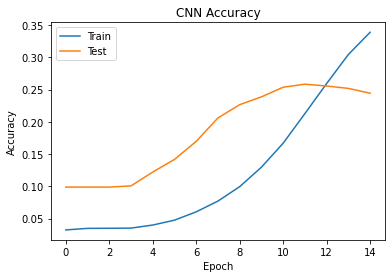

In [91]:
loss, acc = cnn3.evaluate(
    testing,
    steps = len(testing)
)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

plt.plot(train_cnn3.history['accuracy'])
plt.plot(train_cnn3.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [113]:
from keras.layers import Dropout
cnn2 = Sequential()
cnn2.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu', input_shape = (img_size[0], img_size[1], 3)))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2,2), strides = (2, 2), padding = 'valid'))
cnn2.add(Conv2D(32, kernel_size = (4, 4), strides = (1, 1), padding = 'valid', activation = 'relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2,2), strides = (2, 2), padding = 'valid'))
cnn2.add(Conv2D(48, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2,2), strides = (2, 2), padding = 'valid'))
cnn2.add(Flatten())
cnn2.add(Dense(160, activation = 'relu'))  # with 512 neurons
cnn2.add(BatchNormalization())
#cnn2.add(Dropout(0.5))
# 2 neurons outputs the probabilities of the input image belonging to each of the 2 classes: match or not
cnn2.add(Dense(5749, activation = 'softmax'))  
# compile the model: adam optimizer, categorical cross-entropy loss f.
cnn2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)
train_cnn2 = cnn2.fit(
    training,
    steps_per_epoch = len(training),
    epochs = 15,       # number of time the entire dataset is trained
    validation_data = testing,
    validation_steps = len(testing)
)

Epoch 1/15


2023-04-02 14:30:45.584375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


761/761 [==============================] - ETA: 0s - loss: 8.0735 - accuracy: 0.0497

2023-04-02 14:32:08.642871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


761/761 [==============================] - 89s 115ms/step - loss: 8.0735 - accuracy: 0.0497 - val_loss: 5.6523 - val_accuracy: 0.1875
Epoch 2/15
761/761 [==============================] - 92s 121ms/step - loss: 6.7186 - accuracy: 0.1028 - val_loss: 4.2042 - val_accuracy: 0.2976
Epoch 3/15
761/761 [==============================] - 89s 117ms/step - loss: 5.1885 - accuracy: 0.1816 - val_loss: 3.6193 - val_accuracy: 0.3834
Epoch 4/15
761/761 [==============================] - 91s 120ms/step - loss: 3.3401 - accuracy: 0.3584 - val_loss: 3.5038 - val_accuracy: 0.4198
Epoch 5/15
761/761 [==============================] - 92s 121ms/step - loss: 1.5448 - accuracy: 0.7123 - val_loss: 3.4074 - val_accuracy: 0.4580
Epoch 6/15
761/761 [==============================] - 94s 123ms/step - loss: 0.6003 - accuracy: 0.8930 - val_loss: 3.1259 - val_accuracy: 0.4832
Epoch 7/15
761/761 [==============================] - 103s 135ms/step - loss: 0.2985 - accuracy: 0.9465 - val_loss: 3.2328 - val_accuracy: 0.

 3/67 [>.............................] - ETA: 2s - loss: 4.1993 - accuracy: 0.4583

2023-04-02 14:55:37.548914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


67/67 [==============================] - 3s 38ms/step - loss: 3.5142 - accuracy: 0.5075
Test Accuracy: 0.5074626803398132
Test Loss: 3.5141513347625732


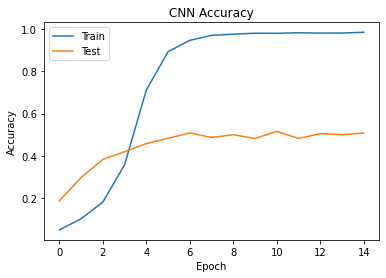

In [115]:
loss, acc = cnn2.evaluate(
    testing,
    steps = len(testing)
)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

plt.plot(train_cnn2.history['accuracy'])
plt.plot(train_cnn2.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [116]:
from keras.layers import Dropout
cnn6 = Sequential()
cnn6.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu', input_shape = (img_size[0], img_size[1], 3)))
cnn6.add(BatchNormalization())
cnn6.add(MaxPooling2D(pool_size = (2,2)))
cnn6.add(Conv2D(32, kernel_size = (4, 4), strides = (1, 1), padding = 'valid', activation = 'relu'))
cnn6.add(BatchNormalization())
cnn6.add(MaxPooling2D(pool_size = (2,2)))
cnn6.add(Conv2D(48, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'))
cnn6.add(BatchNormalization())
cnn6.add(MaxPooling2D(pool_size = (2,2)))
cnn6.add(Flatten())
cnn6.add(Dense(160, activation = 'relu'))  # with 512 neurons
cnn6.add(BatchNormalization())
#cnn2.add(Dropout(0.5))
# 2 neurons outputs the probabilities of the input image belonging to each of the 2 classes: match or not
cnn6.add(Dense(5749, activation = 'softmax'))  
# compile the model: adam optimizer, categorical cross-entropy loss f.
cnn6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [117]:
from tensorflow.keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)
train_cnn6 = cnn6.fit(
    training,
    steps_per_epoch = len(training),
    epochs = 10,       # number of time the entire dataset is trained
    validation_data = testing,
    validation_steps = len(testing)
)

Epoch 1/10


2023-04-02 15:03:29.591888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


761/761 [==============================] - ETA: 0s - loss: 8.1426 - accuracy: 0.0383

2023-04-02 15:04:51.276179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


761/761 [==============================] - 95s 122ms/step - loss: 8.1426 - accuracy: 0.0383 - val_loss: 6.9088 - val_accuracy: 0.1007
Epoch 2/10
761/761 [==============================] - 100s 131ms/step - loss: 6.9435 - accuracy: 0.0771 - val_loss: 4.8990 - val_accuracy: 0.2313
Epoch 3/10
761/761 [==============================] - 88s 115ms/step - loss: 5.6013 - accuracy: 0.1310 - val_loss: 4.3272 - val_accuracy: 0.2864
Epoch 4/10
761/761 [==============================] - 84s 110ms/step - loss: 4.0163 - accuracy: 0.2454 - val_loss: 4.4644 - val_accuracy: 0.3041
Epoch 5/10
761/761 [==============================] - 82s 108ms/step - loss: 2.3651 - accuracy: 0.5273 - val_loss: 4.3756 - val_accuracy: 0.3368
Epoch 6/10
761/761 [==============================] - 82s 108ms/step - loss: 1.2156 - accuracy: 0.7601 - val_loss: 4.3350 - val_accuracy: 0.3489
Epoch 7/10
761/761 [==============================] - 79s 104ms/step - loss: 0.6971 - accuracy: 0.8594 - val_loss: 4.2843 - val_accuracy: 0.

KeyboardInterrupt: 